# Feature-Relationships | Multivariate Analysis

## Introduction
In this section we will go through the data analytics process of Multivariate Analysis to get a better understanding of the Feature-Relationships

To skip directly to to particular parts, use the following links:
1. **[Libraries / Reading Data](#libraries_reading-data)**
2. **[Final Worth (M) vs. Age by Gender | Scatterplot](#final_worth_age_gender_scatter)**
3. **[Billionaires Count by Top Countries Worldwide and Wealth Source | Histogram](#country_wealth_source_hist)**
4. **[Billionaires per Industry, Age and Gender | Violin Plot](#industries_age_gender_violin)**
5. **[International Billionaire Average Final Worth (M) by Global Region and Industry | Facet Grid](#avg_final_worth_global_region_industries_facet)**
6. **[Worldwide Billionaire Correlations between Economic and Demographic Indicators | Heatmap](#corr_heatmap)**

<a id="libraries_reading-data"></a>
## 1. Libraries / Reading Data

In [69]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import warnings
warnings.filterwarnings("ignore")

In [70]:
df = pd.read_csv("../../data/cleaned_data.csv")

In [71]:
media_dir_multivariate = os.path.join("media/multivariate_analysis")

In [72]:
df

,rank,final_worth_usd,person_name,age,country,country_of_citizenship,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country,final_worth_usd_formatted
0,1,211000000000,Bernard Arnault & family,74.0,France,France,Paris,Fashion & Retail,Inherited/Unearned,M,82.5,65.6,102.5,2.715518e+12,60.7,6.705989e+07,211.0B
1,2,180000000000,Elon Musk,51.0,United States,United States,Austin,Automotive,Self-Made,M,78.5,88.2,101.8,2.142770e+13,36.6,3.282395e+08,180.0B
2,3,114000000000,Jeff Bezos,59.0,United States,United States,Medina,Technology,Self-Made,M,78.5,88.2,101.8,2.142770e+13,36.6,3.282395e+08,114.0B
3,4,107000000000,Larry Ellison,78.0,United States,United States,Lanai,Technology,Self-Made,M,78.5,88.2,101.8,2.142770e+13,36.6,3.282395e+08,107.0B
4,5,106000000000,Warren Buffett,92.0,United States,United States,Omaha,Finance & Investments,Self-Made,M,78.5,88.2,101.8,2.142770e+13,36.6,3.282395e+08,106.0B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,2540,1000000000,Yu Rong,51.0,China,China,Shanghai,Healthcare,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,1.0B
2380,2540,1000000000,"Richard Yuengling, Jr.",80.0,United States,United States,Pottsville,Food & Beverage,Inherited/Unearned,M,78.5,88.2,101.8,2.142770e+13,36.6,3.282395e+08,1.0B
2381,2540,1000000000,Zhang Gongyun,60.0,China,China,Gaomi,Manufacturing,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,1.0B
2382,2540,1000000000,Zhang Guiping & family,71.0,China,China,Nanjing,Real Estate,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,1.0B


<a id="final_worth_age_gender_scatter"></a>
## 2. Final Worth (M) vs. Age by Gender | Scatterplot

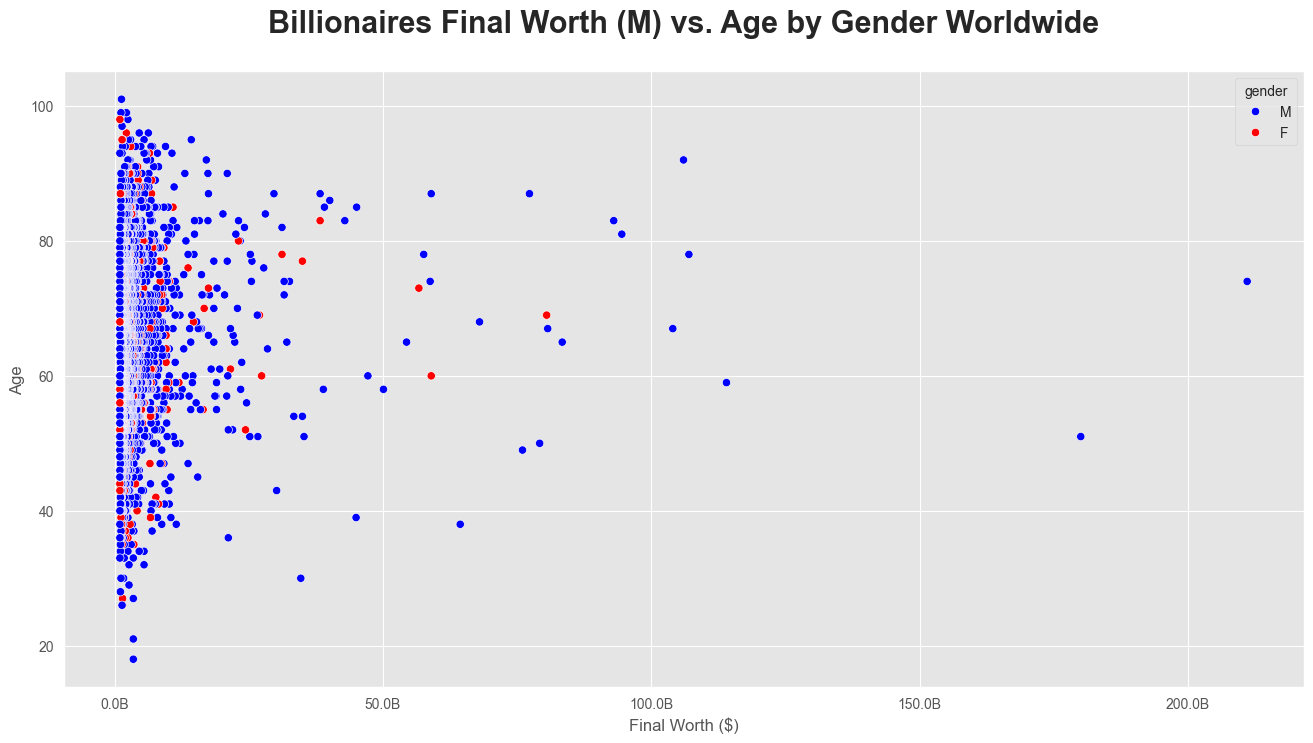

In [73]:
# Create the Scatterplot
plt.figure(figsize=(16, 8))
scatter = sns.scatterplot(x='final_worth_usd',
                y='age',
                hue='gender',
                palette={'M': 'blue', 'F': 'red'},
                data=df)
plt.title('Billionaires Final Worth (M) vs. Age by Gender Worldwide',
          fontweight='bold',
          fontsize=22,
          y=1.05)
scatter.set(xlabel='Final Worth ($)', ylabel='Age')

formatted_labels = [f"{value / 1e9:.1f}B" for value in scatter.get_xticks()]
scatter.set_xticklabels(formatted_labels)

file_name_1 = "Billionaires_Final_Worth_vs_Age_by_Gender_Worldwide.png"
plt.savefig(os.path.join(media_dir_multivariate, file_name_1), bbox_inches='tight')
plt.show()

<a id="country_wealth_source_hist"></a>
## 3. Billionaires Count by Top Countries Worldwide and Wealth Source | Histogram

In [74]:
# Create a list of top 20 countries with most billionaires
top_countries = df['country'].value_counts().head(20).index.tolist()
top_countries

['United States',
 'China',
 'India',
 'Germany',
 'Russia',
 'United Kingdom',
 'Switzerland',
 'Italy',
 'Singapore',
 'Australia',
 'Brazil',
 'Canada',
 'Japan',
 'France',
 'South Korea',
 'Sweden',
 'Turkey',
 'Thailand',
 'Indonesia',
 'Spain']

In [75]:
# Filter the df based on the top 20 countries criteria
df_top_countries = df[df['country'].isin(top_countries)][['country', 'wealth_source']]
df_top_countries

,country,wealth_source
0,France,Inherited/Unearned
1,United States,Self-Made
2,United States,Self-Made
3,United States,Self-Made
4,United States,Self-Made
...,...,...
2378,China,Self-Made
2379,China,Self-Made
2380,United States,Inherited/Unearned
2381,China,Self-Made


In [76]:
# Create a pivot table with 'country' as the index and 'wealth_source' as the columns
# Use 'size' as the aggregation function to count the occurrences of each combination
# Fill NaN entries with 0 to represent countries where a certain wealth source category has no billionaires
df_pivot_wealth_source = pd.pivot_table(df_top_countries,
                                        index="country",
                                        columns="wealth_source",
                                        aggfunc='size').fillna(0).reset_index()
# Create a new column 'total' by summing up the counts of 'Inherited/Unearned' and 'Self-Made'
df_pivot_wealth_source['total'] = df_pivot_wealth_source['Inherited/Unearned'] + df_pivot_wealth_source['Self-Made']
df_pivot_wealth_source

wealth_source,country,Inherited/Unearned,Self-Made,total
0,Australia,14.0,29.0,43.0
1,Brazil,26.0,17.0,43.0
2,Canada,11.0,28.0,39.0
3,China,15.0,489.0,504.0
4,France,19.0,15.0,34.0
5,Germany,57.0,30.0,87.0
6,India,90.0,67.0,157.0
7,Indonesia,10.0,14.0,24.0
8,Italy,31.0,24.0,55.0
9,Japan,8.0,28.0,36.0


In [77]:
# Merge the original DataFrame 'df_top_countries' with the pivot table 'df_pivot_wealth_source'
# on the 'country' column, keeping only the columns 'country' and 'total' from the pivot table
# Sort the resulting DataFrame by the 'total' column in descending order
df_wealth_source_merged = pd.merge(df_top_countries, df_pivot_wealth_source[['country', 'total']], on='country').sort_values(by='total', ascending=False)
df_wealth_source_merged

,country,wealth_source,total
1087,United States,Self-Made,750.0
448,United States,Self-Made,750.0
647,United States,Self-Made,750.0
648,United States,Inherited/Unearned,750.0
1522,United States,Self-Made,750.0
...,...,...,...
987,Spain,Inherited/Unearned,24.0
566,Indonesia,Self-Made,24.0
1948,Indonesia,Inherited/Unearned,24.0
555,Indonesia,Self-Made,24.0


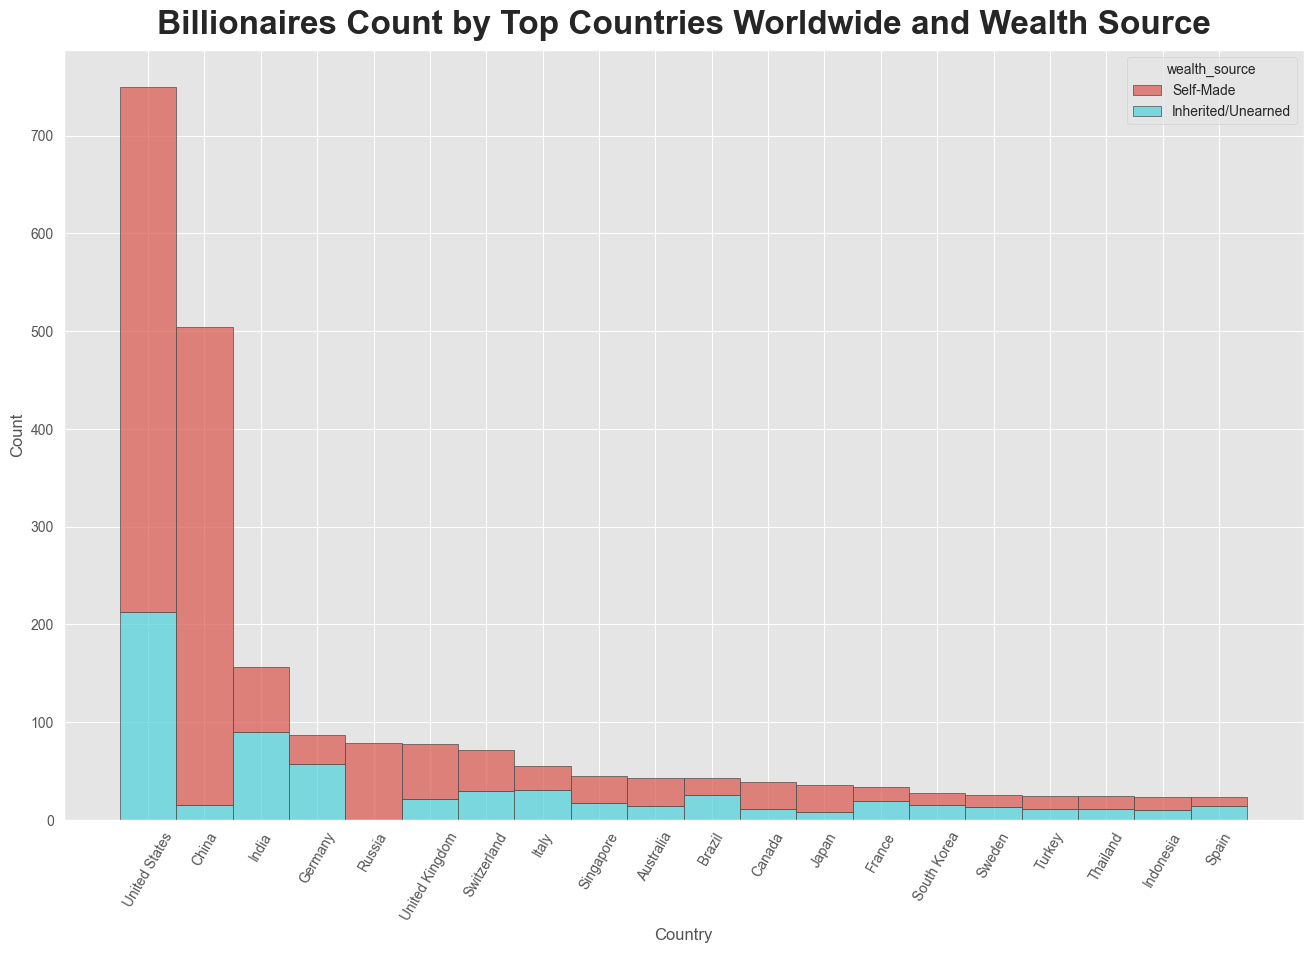

In [78]:
# Create the histogram
plt.figure(figsize=(16, 10))
sns.histplot(
    data=df_wealth_source_merged,
    x="country",
    hue="wealth_source",
    edgecolor=".3",
    palette="hls",
    multiple='stack',
    linewidth=.5,
    stat='count'
)
plt.xticks(rotation=60)
plt.title("Billionaires Count by Top Countries Worldwide and Wealth Source",
          fontsize=24,
          fontweight='bold',
          y=1.01)
plt.ylabel("Count")
plt.xlabel("Country")
file_name_2 = "Billionaires_Count_by_Top_Countries_Worldwide_and_Wealth_Source.png"
plt.savefig(os.path.join(media_dir_multivariate, file_name_2), bbox_inches='tight')
plt.show()

<a id="industries_age_gender_violin"></a>
## 4. Billionaires per Industry, Age and Gender | Violin Plot

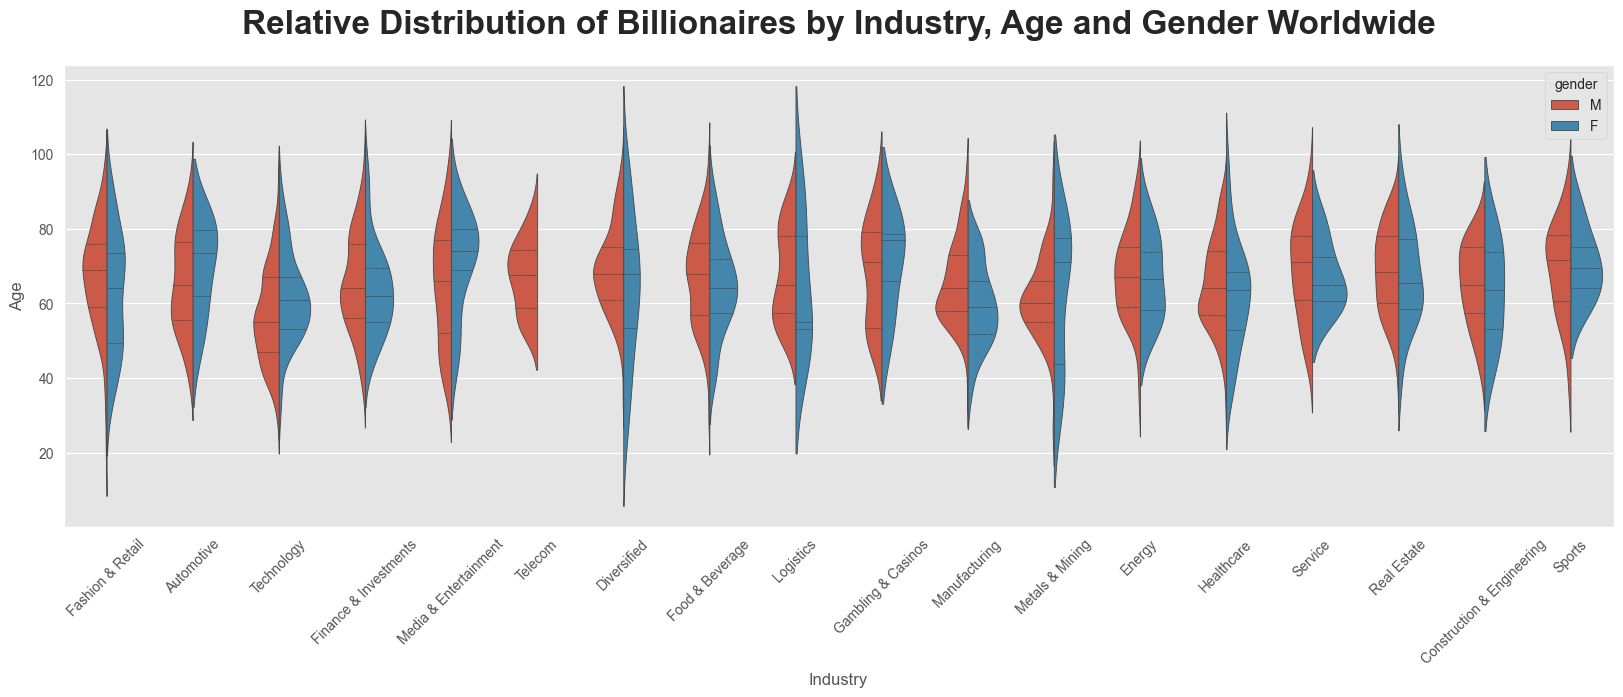

In [79]:
# Create the Violinplot 
plt.figure(figsize=(20, 6))
sns.violinplot(data=df,
               x="industries",
               y="age",
               hue='gender',
               inner="quart",
               split=True)
plt.title("Relative Distribution of Billionaires by Industry, Age and Gender Worldwide",
          y=1.05,
          fontsize=24,
          fontweight="bold")
plt.ylabel("Age")
plt.xlabel("Industry")
plt.xticks(rotation=45)
file_name_3 = "Relative_Distribution_of_Billionaires_by_Industry_Age_and_Gender_Worldwide.png"
plt.savefig(os.path.join(media_dir_multivariate, file_name_3), bbox_inches='tight')
plt.show()

<a id="avg_final_worth_global_region_industries_facet"></a>
## 5. International Billionaire Average Final Worth (M) by Global Region and Industry | Facet Grid

In [80]:
# Dictionary mapping countries to their respective global regions
country_to_global_region_dict = {
    'France': 'West Europe',
    'United States': 'North America',
    'Mexico': 'North America',
    'India': 'Asia',
    'Spain': 'West Europe',
    'China': 'Asia',
    'Canada': 'North America',
    'Germany': 'West Europe',
    'Switzerland': 'West Europe',
    'Belgium': 'West Europe',
    'Hong Kong': 'Asia',
    'Austria': 'West Europe',
    'Japan': 'Asia',
    'United Kingdom': 'West Europe',
    'Australia': 'Oceania',
    'Indonesia': 'Asia',
    'United Arab Emirates': 'Asia',
    'Russia': 'East Europe',
    'Chile': 'South America',
    'Monaco': 'West Europe',
    'Czech Republic': 'East Europe',
    'Sweden': 'West Europe',
    'Thailand': 'Asia',
    'Uzbekistan': 'Asia',
    'Singapore': 'Asia',
    'Nigeria': 'Africa',
    'Israel': 'Asia',
    'Italy': 'West Europe',
    'South Africa': 'Africa',
    'Brazil': 'South America',
    'Malaysia': 'Asia',
    'South Korea': 'Asia',
    'New Zealand': 'Oceania',
    'Philippines': 'Asia',
    'Taiwan': 'Asia',
    'Norway': 'West Europe',
    'Egypt': 'Africa',
    'Denmark': 'West Europe',
    'Eswatini (Swaziland)': 'Africa',
    'Colombia': 'South America',
    'Netherlands': 'West Europe',
    'Poland': 'East Europe',
    'Bahamas': 'North America',
    'Ukraine': 'East Europe',
    'Cayman Islands': 'North America',
    'Greece': 'West Europe',
    'Turkey': 'Asia',
    'Argentina': 'South America',
    'Georgia': 'East Europe',
    'Portugal': 'West Europe',
    'Kazakhstan': 'Asia',
    'Algeria': 'Africa',
    'Vietnam': 'Asia',
    'Latvia': 'East Europe',
    'Finland': 'West Europe',
    'Bermuda': 'North America',
    'Luxembourg': 'West Europe',
    'British Virgin Islands': 'North America',
    'Cambodia': 'Asia',
    'Lebanon': 'Asia',
    'Oman': 'Asia',
    'Ireland': 'West Europe',
    'Cyprus': 'Asia',
    'Guernsey': 'West Europe',
    'Liechtenstein': 'West Europe',
    'Turks and Caicos Islands': 'North America',
    'Romania': 'East Europe',
    'Qatar': 'Asia',
    'Uruguay': 'South America',
    'Nepal': 'Asia',
    'Slovakia': 'East Europe',
    'Morocco': 'Africa',
    'Hungary': 'East Europe',
    'Tanzania': 'Africa',
    'Bahrain': 'Asia',
    'Peru': 'South America',
    'Andorra': 'West Europe',
    'Armenia': 'East Europe',
    'NaN': 'Unknown'
}

In [81]:
# Create a new column 'global_region' by mapping the 'country' column using the provided dictionary
df['global_region'] = df['country'].replace(country_to_global_region_dict)
# Verify that the replacement worked for every country
df.query('country == global_region')

,rank,final_worth_usd,person_name,age,country,country_of_citizenship,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country,final_worth_usd_formatted,global_region


In [82]:
# Group the DataFrame by 'industries' and 'global_region', calculate the mean of 'final_worth_usd', and reset the index
avg_final_worth_per_global_region = df.groupby(['industries', 'global_region'])['final_worth_usd'].mean().reset_index()
avg_final_worth_per_global_region

,industries,global_region,final_worth_usd
0,Automotive,Asia,4.629545e+09
1,Automotive,North America,1.882500e+10
2,Automotive,West Europe,6.792308e+09
3,Construction & Engineering,Africa,7.400000e+09
4,Construction & Engineering,Asia,1.876923e+09
...,...,...,...
94,Telecom,Asia,4.200000e+09
95,Telecom,East Europe,1.700000e+09
96,Telecom,North America,1.602857e+10
97,Telecom,Oceania,1.500000e+09


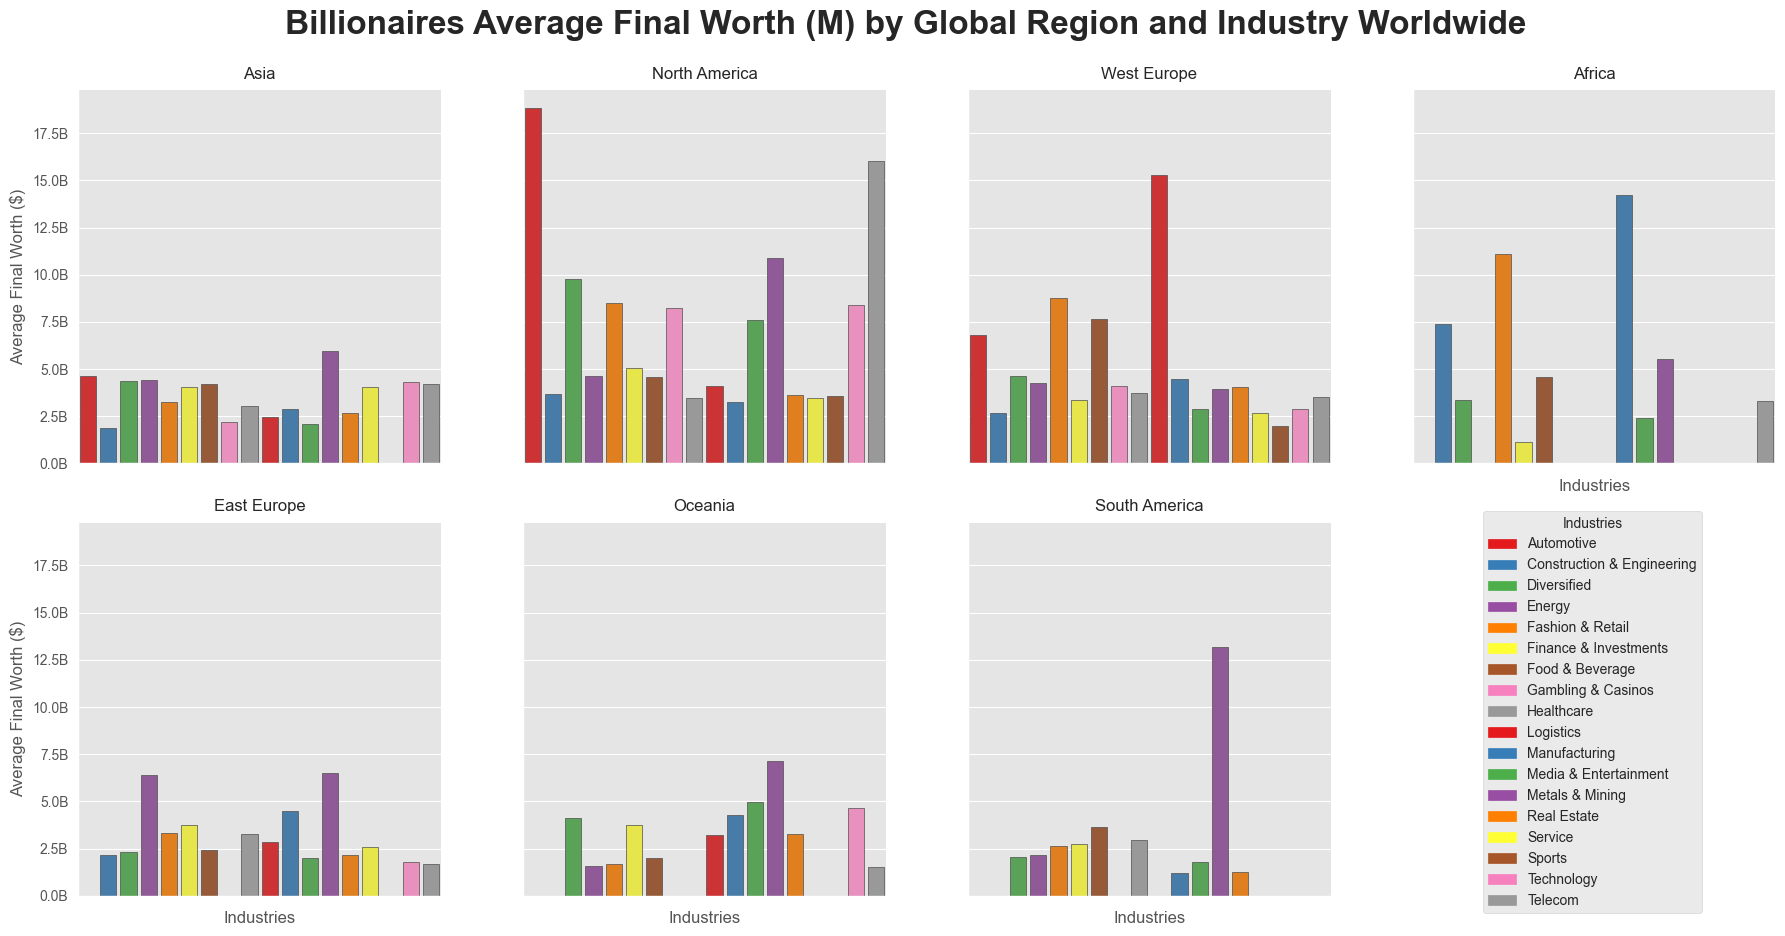

In [83]:
# Create a FacetGrid for each global region with a bar plot for average final worth in each industry
grid = sns.FacetGrid(data=avg_final_worth_per_global_region,
                  col='global_region',
                  col_wrap=4,
                  height=4.5,
                  hue='industries',
                  palette='Set1'
                  )

# Define a function to set individual subplot titles
def set_title(col_name):
    plt.gca().set_title(col_name)

# Map a bar plot for each industry by global region
grid.map(sns.barplot,
      'industries', 'final_worth_usd',
      edgecolor=".3",
      order=avg_final_worth_per_global_region['industries'].unique(),
      legend=False
      ).set_titles("{col_name}", verticalalignment='bottom')

grid.set_xticklabels(rotation=45)
grid.set_axis_labels('Industries', 'Average Final Worth ($)')

# Adjust y-axis tick labels
formatted_labels = [f"{value / 1e9:.1f}B" for value in plt.gca().get_yticks()]
plt.gca().set_yticklabels(formatted_labels)

# Create custom legend handles
handles = [mpatches.Patch(color=color,
                          label=label) for color, label in
           zip(sns.color_palette('Set1', n_colors=18), avg_final_worth_per_global_region['industries'].unique())]

# Add legend and adjust layout
plt.legend(handles=handles, title='Industries', bbox_to_anchor=(1.4, 1.05), loc='upper left')

# Set overall title
title = plt.suptitle("Billionaires Average Final Worth (M) by Global Region and Industry Worldwide",
                     y=1.05,
                     fontweight='bold',
                     fontsize=24,
                     )

# Set individual subplot titles
grid.set_titles(col_template="{col_name}", row_template="{row_name}", verticalalignment='bottom')

file_name_4 = "Billionaires_Average_Final_Worth_by_Global_Region_and_Industry_Worldwide.png"
plt.savefig(os.path.join(media_dir_multivariate, file_name_4), bbox_inches='tight')
plt.show()


<a id="corr_heatmap"></a>
## 6. Worldwide Billionaire Correlations between Economic and Demographic Indicators | Heatmap

In [84]:
# Select numerical columns excluding the 'rank' column and calculate the correlation matrix
corr_df = df.select_dtypes(exclude='object').drop('rank', axis=1).corr()
corr_df

,final_worth_usd,age,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country
final_worth_usd,1.000000,0.061611,0.024380,0.065300,-0.010040,0.035914,-0.037038,-0.054723
age,0.061611,1.000000,0.023309,0.064680,0.066280,-0.074021,-0.157074,-0.174421
life_expectancy_country,0.024380,0.023309,1.000000,0.528540,-0.311766,-0.044281,-0.266597,-0.520507
gross_tertiary_education_enrollment_country,0.065300,0.064680,0.528540,1.000000,-0.302663,0.309582,-0.404795,-0.548400
gross_primary_education_enrollment_country,-0.010040,0.066280,-0.311766,-0.302663,1.000000,-0.367894,0.101205,0.019043
gdp_country_usd,0.035914,-0.074021,-0.044281,0.309582,-0.367894,1.000000,0.141162,0.433586
total_tax_rate_country,-0.037038,-0.157074,-0.266597,-0.404795,0.101205,0.141162,1.000000,0.648666
population_country,-0.054723,-0.174421,-0.520507,-0.548400,0.019043,0.433586,0.648666,1.000000


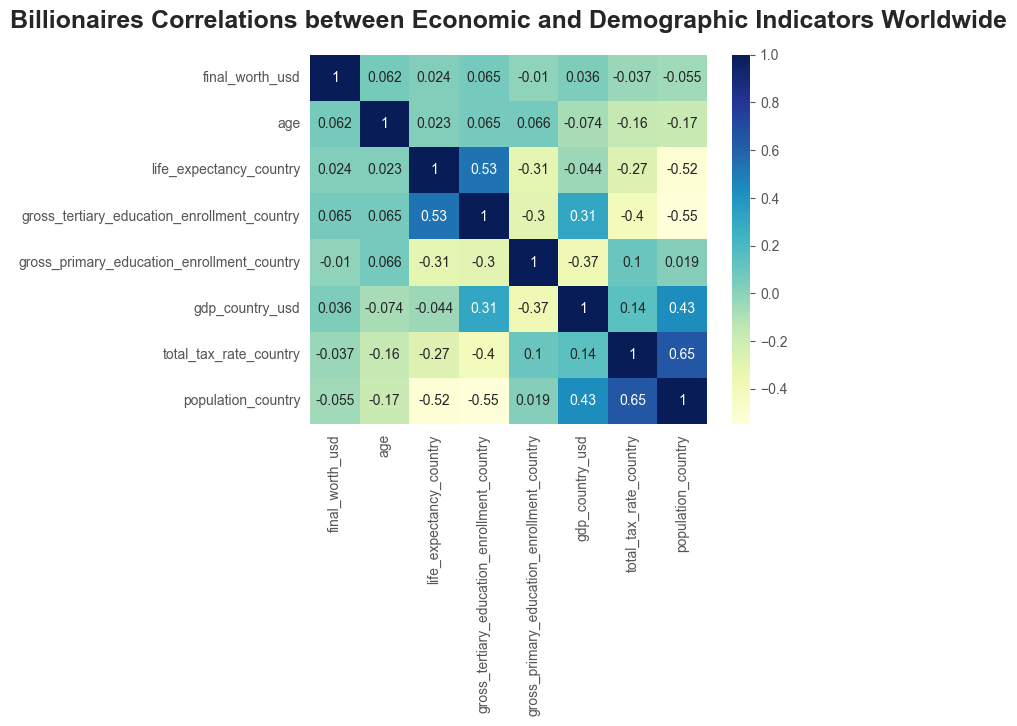

In [85]:
# Create a heatmap of the correlation matrix
sns.heatmap(data=corr_df,
            annot=True,
            cmap='YlGnBu')
plt.title("Billionaires Correlations between Economic and Demographic Indicators Worldwide",
          y=1.05,
          fontweight='bold',
          fontsize=18)
file_name_5 = "Billionaires_Correlations_between_Economic_and_Demographic_Indicators_Worldwide.png"
plt.savefig(os.path.join(media_dir_multivariate, file_name_5),
            bbox_inches='tight')
plt.show()